In [19]:
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import numpy as np

In [20]:
data = pd.read_csv(r"/Users/main/Vault/Thesis/Data/pm25_weer.csv")
data

,id,no2,pm10,pm10_cal,pm10_fac,pm10_max,pm10_min,pm25,pm25_cal,pm25_fac,...,YYYYMMDD,jaar,maand,weeknummer,dag,H,T,U,DD,FH
0,1,NaN,8.195,8.774,1.070000,8.39,8.00,4.000,1.640,0.410000,...,20190712,2019,7,28,12,14,173,86,320,60
1,4,NaN,17.258,18.165,1.052000,20.10,15.60,11.176,4.256,0.381000,...,20190712,2019,7,28,12,14,173,86,320,60
2,5,NaN,19.952,20.497,1.027000,24.40,16.50,10.810,3.996,0.370000,...,20190712,2019,7,28,12,14,173,86,320,60
3,7,NaN,20.278,21.216,1.042000,24.40,16.20,11.510,4.292,0.371000,...,20190712,2019,7,28,12,14,173,86,320,60
4,10,NaN,18.099,19.186,1.062000,21.90,14.70,8.942,3.471,0.390000,...,20190712,2019,7,28,12,14,173,86,320,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349808,199,33.4319,24.660,16.796,0.681103,28.50,20.50,11.910,9.877,0.829303,...,20221022,2022,10,42,22,23,127,92,140,20
1349809,200,43.1974,0.000,0.000,NaN,0.00,0.00,0.000,0.000,NaN,...,20221022,2022,10,42,22,23,127,92,140,20
1349810,212,2.5000,23.074,22.407,0.971261,29.30,18.29,7.887,11.534,1.461850,...,20221022,2022,10,42,22,23,127,92,140,20
1349811,213,39.1156,37.694,36.569,0.970257,60.80,24.40,9.182,13.432,1.463180,...,20221022,2022,10,42,22,23,127,92,140,20


In [21]:
data.columns

Index(['id', 'no2', 'pm10', 'pm10_cal', 'pm10_fac', 'pm10_max', 'pm10_min',
       'pm25', 'pm25_cal', 'pm25_fac', 'pm25_max', 'pm25_min', 'timestamp',
       'components', 'latitude', 'longitude', 'name', 'sensortype', 'tag',
       'datum', 'tijd', 'weekdag', 'uur', '#STN', 'YYYYMMDD', 'jaar', 'maand',
       'weeknummer', 'dag', 'H', 'T', 'U', 'DD', 'FH'],
      dtype='object')

In [22]:
data.drop(data.iloc[:, 0:7], axis=1, inplace=True)
data.drop(["jaar", "maand", "weeknummer", "#STN", "timestamp", "components","longitude", "latitude", "dag", "tijd", "datum", "H", "T", "U", "DD", "weekdag", "FH", "sensortype"], axis=1, inplace=True)
data

,pm25,pm25_cal,pm25_fac,pm25_max,pm25_min,name,tag,uur,YYYYMMDD
0,4.000,1.640,0.410000,4.1,3.9,Zuiderkade,Beverwijk,14,20190712
1,11.176,4.256,0.381000,12.4,10.1,Grote Houtweg,Beverwijk,14,20190712
2,10.810,3.996,0.370000,12.3,9.0,Westerhoutplein,Beverwijk,14,20190712
3,11.510,4.292,0.371000,13.9,10.0,Beukenstraat,Beverwijk,14,20190712
4,8.942,3.471,0.390000,10.3,7.3,Parallelweg,Beverwijk,14,20190712
...,...,...,...,...,...,...,...,...,...
1349808,11.910,9.877,0.829303,15.2,10.3,Zuiderkade,Beverwijk,23,20221022
1349809,0.000,0.000,NaN,0.0,0.0,Stationsplein,Beverwijk,23,20221022
1349810,7.887,11.534,1.461850,8.7,7.2,Fluitekruidweg,Zaandam,23,20221022
1349811,9.182,13.432,1.463180,10.5,8.3,Fluitekruidweg,Zaandam,23,20221022


In [23]:
data = data[data.pm25 != 0]
data = data.dropna()
data

,pm25,pm25_cal,pm25_fac,pm25_max,pm25_min,name,tag,uur,YYYYMMDD
0,4.000,1.640,0.410000,4.1,3.9,Zuiderkade,Beverwijk,14,20190712
1,11.176,4.256,0.381000,12.4,10.1,Grote Houtweg,Beverwijk,14,20190712
2,10.810,3.996,0.370000,12.3,9.0,Westerhoutplein,Beverwijk,14,20190712
3,11.510,4.292,0.371000,13.9,10.0,Beukenstraat,Beverwijk,14,20190712
4,8.942,3.471,0.390000,10.3,7.3,Parallelweg,Beverwijk,14,20190712
...,...,...,...,...,...,...,...,...,...
1349807,3.815,3.306,0.865445,6.6,2.7,Schutterskwartier,Heemskerk,23,20221022
1349808,11.910,9.877,0.829303,15.2,10.3,Zuiderkade,Beverwijk,23,20221022
1349810,7.887,11.534,1.461850,8.7,7.2,Fluitekruidweg,Zaandam,23,20221022
1349811,9.182,13.432,1.463180,10.5,8.3,Fluitekruidweg,Zaandam,23,20221022


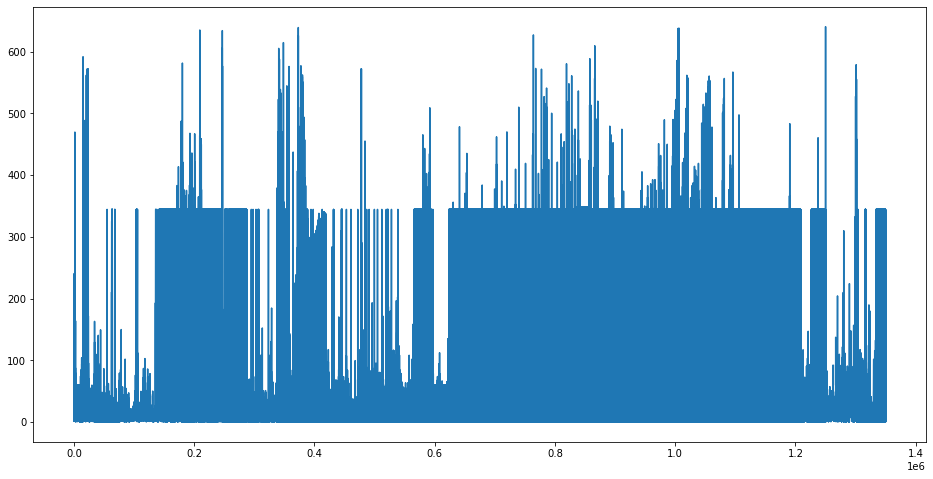

In [24]:
plt.figure(figsize=(16, 8))
plt.plot(data["pm25"])
plt.show()

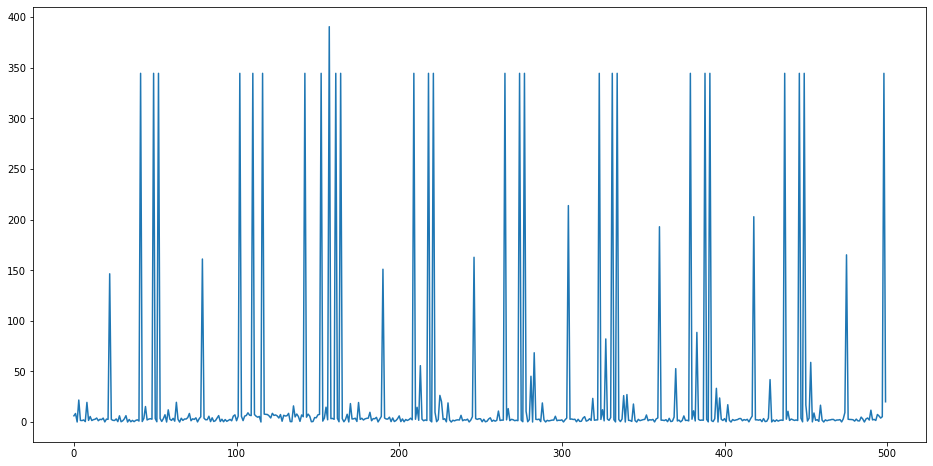

In [25]:
data3 = data["pm25"].to_numpy()

plt.figure(figsize=(16, 8))
plt.plot(data3[700000:700500])
plt.show()

In [26]:
# data = data[data.pm25 < 200]

In [27]:
grouped_df = data.groupby(["YYYYMMDD", "tag"])["pm25"].mean().copy().reset_index()

In [28]:
grouped_df.head(50)

,YYYYMMDD,tag,pm25
0,20190625,Amsterdam,16.602565
1,20190625,Beverwijk,23.527500
2,20190626,Amsterdam,21.974609
3,20190626,Beverwijk,2.851417
4,20190627,Amsterdam,4.484500
5,20190627,Beverwijk,4.010603
6,20190628,Amsterdam,7.430917
7,20190628,Beverwijk,5.533953
8,20190629,Amsterdam,7.474792
9,20190629,Beverwijk,9.006055


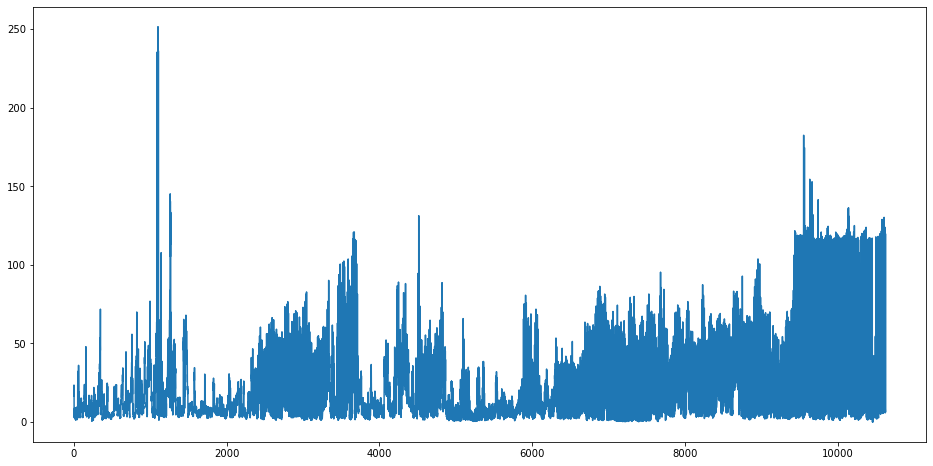

In [29]:
plt.figure(figsize=(16, 8))
plt.plot(grouped_df["pm25"])
plt.show()

In [30]:
data2 = grouped_df.copy()
data2["New"] = data2["YYYYMMDD"].astype(str) #+ "-" +data2["uur"].astype(str)
del data2["YYYYMMDD"]

In [31]:
data2.set_index("New", inplace=True)

In [32]:
data2

,tag,pm25
New,,
20190625,Amsterdam,16.602565
20190625,Beverwijk,23.527500
20190626,Amsterdam,21.974609
20190626,Beverwijk,2.851417
20190627,Amsterdam,4.484500
...,...,...
20221022,IJmuiden,8.756045
20221022,Uithoorn,7.120000
20221022,Velsen-Noord,6.428708


In [33]:
UniqueNames = data2.tag.unique()

DataFrameDict = {elem : pd.DataFrame() for elem in UniqueNames}

for key in DataFrameDict.keys():
    DataFrameDict[key] = data2[:][data2.tag == key]

In [34]:
DataFrameDict["Amsterdam"]

,tag,pm25
New,,
20190625,Amsterdam,16.602565
20190626,Amsterdam,21.974609
20190627,Amsterdam,4.484500
20190628,Amsterdam,7.430917
20190629,Amsterdam,7.474792
...,...,...
20221018,Amsterdam,62.397567
20221019,Amsterdam,51.639809
20221020,Amsterdam,62.126931


  0%|          | 0/11 [00:00<?, ?it/s]

Amsterdam


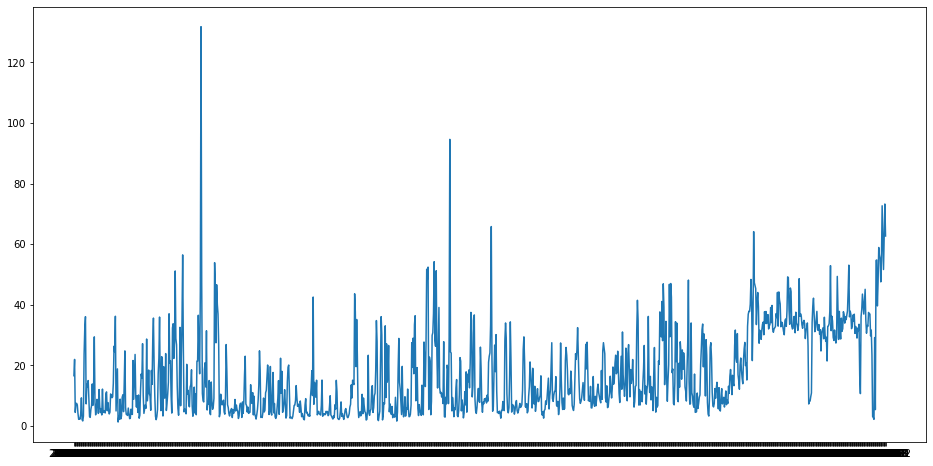

  9%|▉         | 1/11 [00:09<01:32,  9.26s/it]

Beverwijk


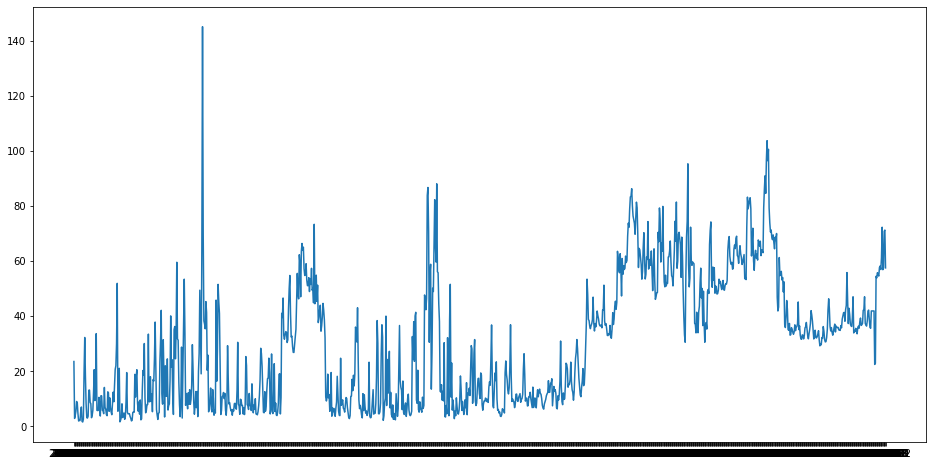

 18%|█▊        | 2/11 [00:18<01:25,  9.47s/it]

Heemskerk


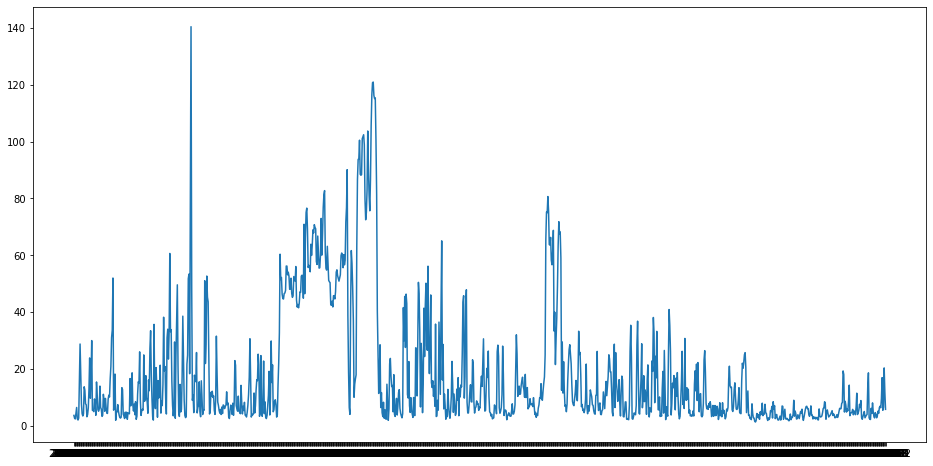

 27%|██▋       | 3/11 [00:28<01:15,  9.49s/it]

Wijk aan Zee


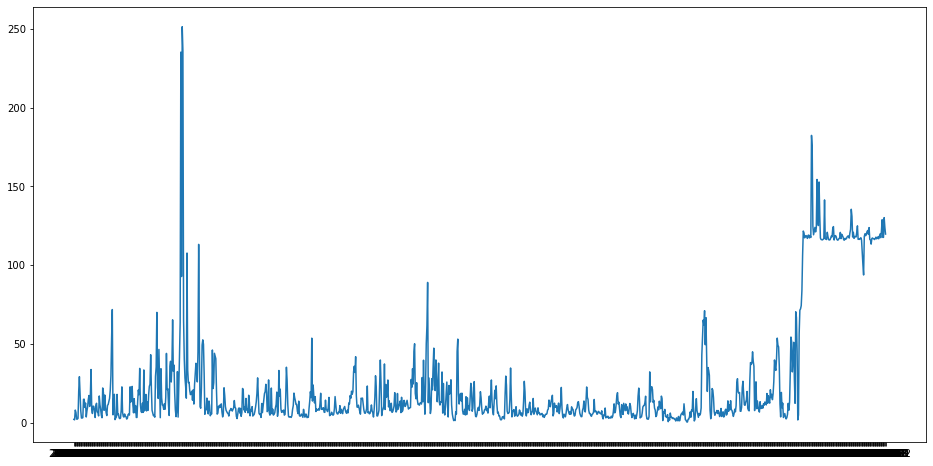

 36%|███▋      | 4/11 [00:37<01:04,  9.16s/it]

Velsen-Noord


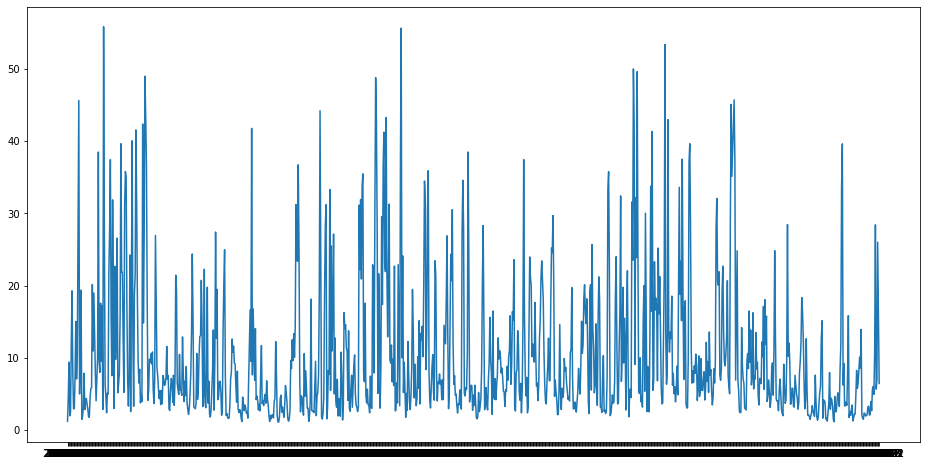

 45%|████▌     | 5/11 [00:44<00:52,  8.70s/it]

Driehuis


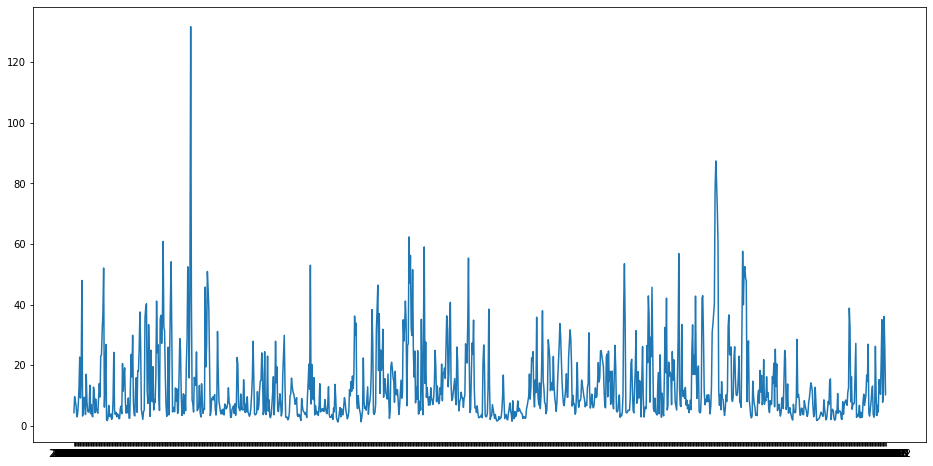

 55%|█████▍    | 6/11 [00:53<00:42,  8.51s/it]

IJmuiden


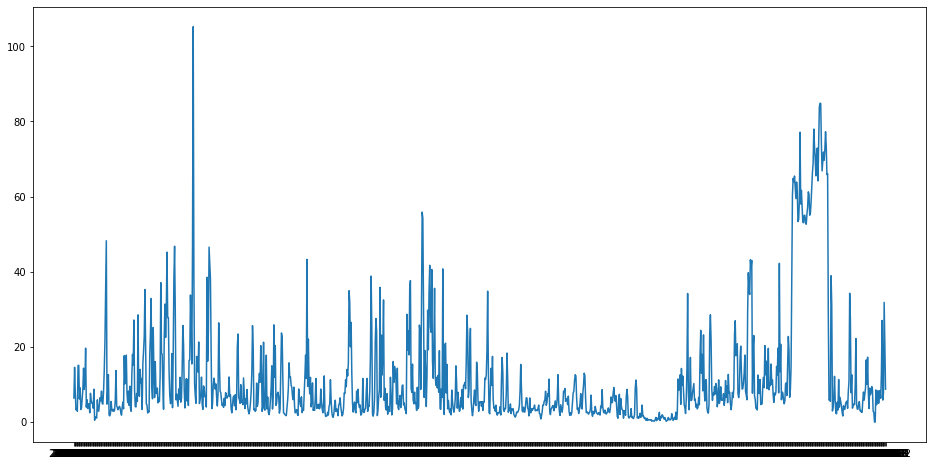

 64%|██████▎   | 7/11 [01:01<00:33,  8.34s/it]

Velsen-Zuid


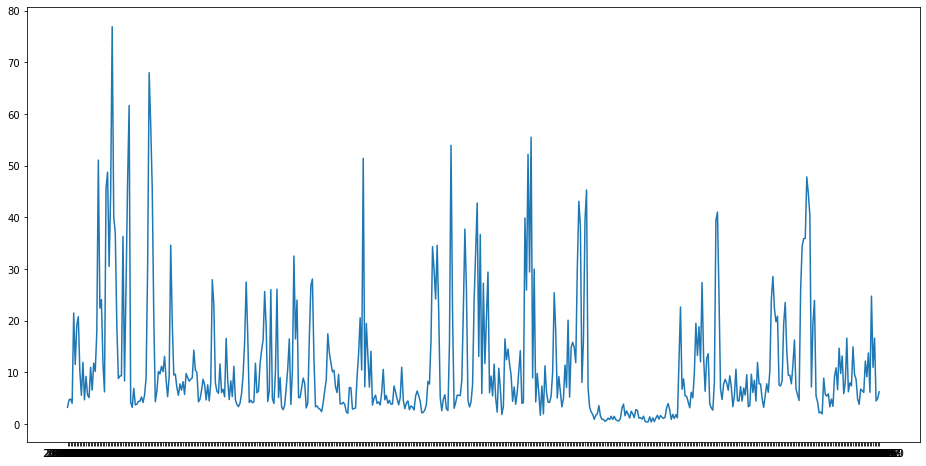

 73%|███████▎  | 8/11 [01:05<00:20,  6.96s/it]

Zaandam


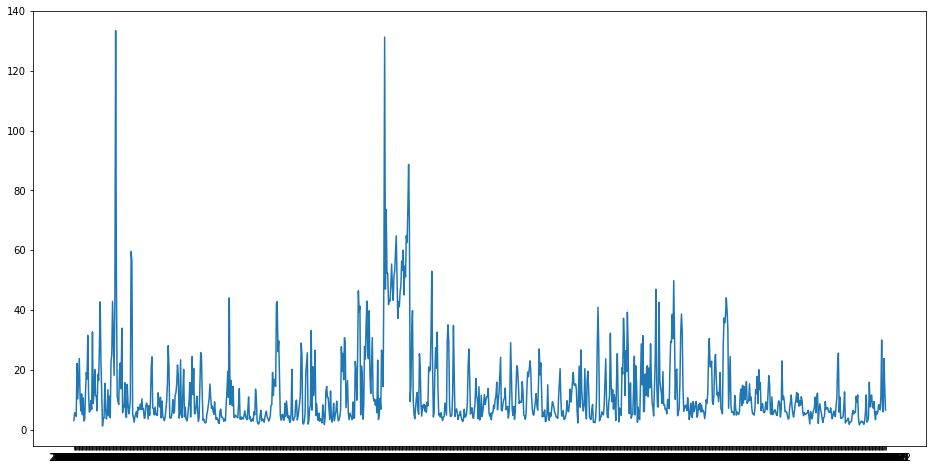

 82%|████████▏ | 9/11 [01:12<00:14,  7.24s/it]

Koog aan de Zaan


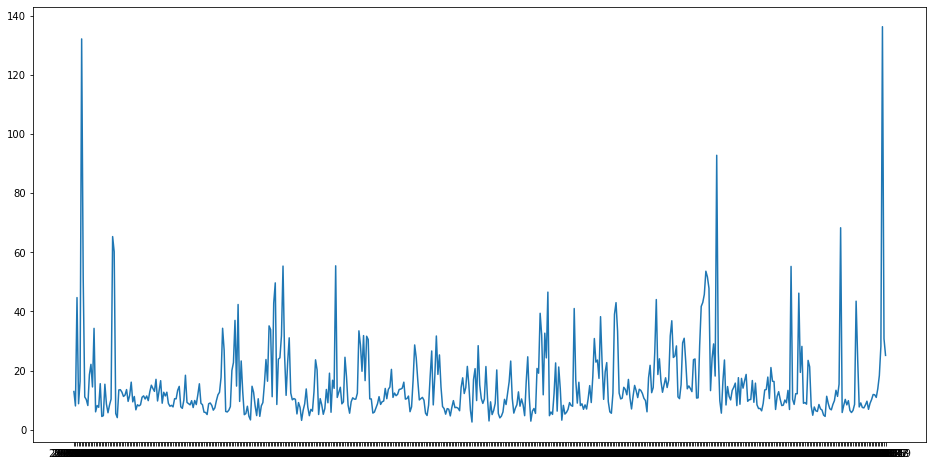

 91%|█████████ | 10/11 [01:16<00:06,  6.19s/it]

Uithoorn


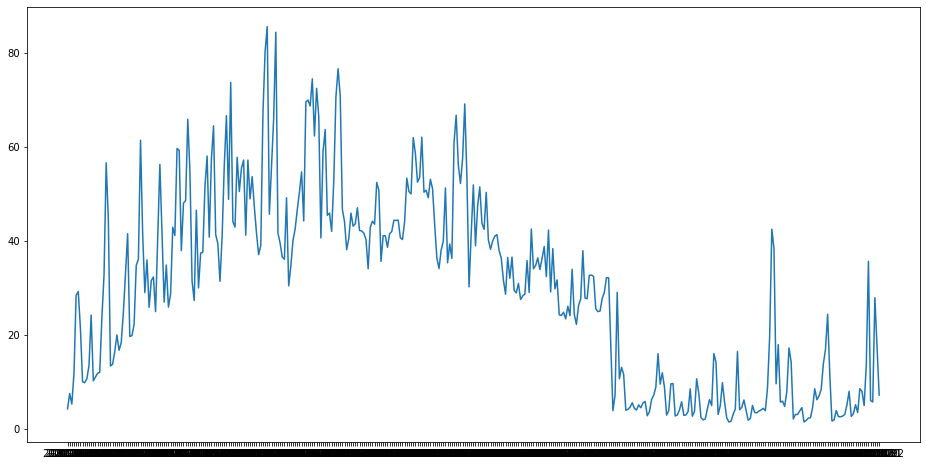

100%|██████████| 11/11 [01:19<00:00,  7.24s/it]


In [35]:
for key in tqdm(DataFrameDict):
    print(key)
    plt.figure(figsize=(16, 8))
    plt.plot(DataFrameDict[key].pm25, label = key)
    plt.show()

In [36]:
for key in tqdm(DataFrameDict):
    DataFrameDict[key].rename(columns={"pm25":key}, inplace=True)
    del DataFrameDict[key]["tag"]
    print(DataFrameDict[key])

100%|██████████| 11/11 [00:00<00:00, 335.11it/s]

          Amsterdam
New                
20190625  16.602565
20190626  21.974609
20190627   4.484500
20190628   7.430917
20190629   7.474792
...             ...
20221018  62.397567
20221019  51.639809
20221020  62.126931
20221021  73.267709
20221022  62.699718

[1195 rows x 1 columns]
          Beverwijk
New                
20190625  23.527500
20190626   2.851417
20190627   4.010603
20190628   5.533953
20190629   9.006055
...             ...
20221018  56.889090
20221019  57.571965
20221020  70.835828
20221021  71.279301
20221022  57.537308

[1200 rows x 1 columns]
          Heemskerk
New                
20190702   3.702000
20190703   2.701783
20190704   2.456625
20190705   4.618917
20190706   6.488875
...             ...
20221018   5.499161
20221019   6.522591
20221020  20.398967
20221021  11.827651
20221022   5.832736

[1186 rows x 1 columns]
          Wijk aan Zee
New                   
20190703      2.059048
20190704      1.748930
20190705      7.951859
20190706      6.433143
2019070

In [47]:
for key in tqdm(DataFrameDict):
    model = AutoReg(DataFrameDict[key], lags=1).fit()
    print(f'{key}\n', model.params)

  0%|          | 0/11 [00:00<?, ?it/s]/Users/main/opt/miniconda3/envs/RA/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/main/opt/miniconda3/envs/RA/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/main/opt/miniconda3/envs/RA/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/main/opt/miniconda3/envs/RA/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provi

Amsterdam
 const           4.728787
Amsterdam.L1    0.720903
dtype: float64
Beverwijk
 const           2.699650
Beverwijk.L1    0.910032
dtype: float64
Heemskerk
 const           2.084885
Heemskerk.L1    0.885518
dtype: float64
Wijk aan Zee
 const              2.006063
Wijk aan Zee.L1    0.924275
dtype: float64
Velsen-Noord
 const              5.074105
Velsen-Noord.L1    0.516426
dtype: float64
Driehuis
 const          5.182662
Driehuis.L1    0.597207
dtype: float64
IJmuiden
 const          1.795453
IJmuiden.L1    0.842454
dtype: float64
Velsen-Zuid
 const             4.497042
Velsen-Zuid.L1    0.596465
dtype: float64
Zaandam
 const         3.931144
Zaandam.L1    0.682857
dtype: float64
Koog aan de Zaan
 const                  9.994040
Koog aan de Zaan.L1    0.344003
dtype: float64
Uithoorn
 const          3.402402
Uithoorn.L1    0.885760
dtype: float64


In [38]:
for key in DataFrameDict:
    print(key)

Amsterdam
Beverwijk
Heemskerk
Wijk aan Zee
Velsen-Noord
Driehuis
IJmuiden
Velsen-Zuid
Zaandam
Koog aan de Zaan
Uithoorn


In [39]:
for key in tqdm(DataFrameDict):
    for key2 in tqdm(DataFrameDict):
        idx1 = DataFrameDict[key].index
        idx2 = DataFrameDict[key2].index
        print(len(idx1.difference(idx2)))

100%|██████████| 11/11 [00:00<00:00, 919.80it/s]


0
3
19
13
117
75
21
667
151
670
816


100%|██████████| 11/11 [00:00<00:00, 972.42it/s]


8
0
19
15
119
80
24
672
154
675
821


100%|██████████| 11/11 [00:00<00:00, 1100.76it/s]


10
5
0
13
110
78
20
659
139
661
807


100%|██████████| 11/11 [00:00<00:00, 1142.86it/s]


3
0
12
0
104
65
9
657
146
660
806


100%|██████████| 11/11 [00:00<00:00, 1311.88it/s]


3
0
5
0
0
59
5
567
83
573
702


100%|██████████| 11/11 [00:00<00:00, 1209.97it/s]


0
0
12
0
98
0
2
600
131
610
741


100%|██████████| 11/11 [00:00<00:00, 1100.76it/s]


4
2
12
2
102
60
0
650
137
653
799


 73%|███████▎  | 8/11 [00:00<00:00, 74.31it/s]

0
0
1
0
14
8
0
0
46
244
397


100%|██████████| 11/11 [00:00<00:00, 1241.79it/s]


7
5
4
12
53
62
10
569
0
526
672


100%|██████████| 11/11 [00:00<00:00, 1560.06it/s]


0
0
0
0
17
15
0
241
0
0
265


100%|██████████| 11/11 [00:00<00:00, 77.33it/s]

0
0
0
0
0
0
0
248
0
119
0
